# Task6 总结

## 前言

经过在datawhale数据挖掘实践（资金流入流出预测）6天的学习，对于数据挖掘从数据探索与分析、时间序列规则、时间序列模型、特征工程、建模预测5个方面对于数据挖掘的整个过程有了一个深入的理解。  
通过运行小雨姑娘给出的每个环节的案例代码并且在运行完后去理解一下后掌握了不少新的知识。在学习coding的道路上我一直坚持不需要去死记代码，只需要去理解他，对于好的代码保存好，在未来也许自己做项目的时候里面某一小段或者某一句就会被用上。  
整个学习环节的节奏还是比较紧凑的毕竟除了第一节后面几乎都是每天一个task，对于上班族来说的确有点赶。但是慢慢也就习惯了，就像群里的小伙伴说的时间挤挤还是会有的。学习的时间就是被这么挤出来的。

## 遇到的困难

1.整个学习过程总体还是比较流畅的，主要还是在第Task3，因为用到了R语言，然后自己本身对于R语言没有什么太多了解，想要短期上手也有点难度。本来打算得过且过用天池跑一下R的代码实现一下，结果发现好像也有点小问题。主要是data.table安装没能装上。按照自己的性格与其死扛不如换种方法。于是我就开始百度搜索各种LSTM长短期记忆网络的介绍和代码。然后找了一段实现了一下，不过训练完的结果有点糟糕。不过尝试过了探索过了也就好了，这只是一个起点，并不会是终点。于是在TASK5结束后我有去看了一下发现天池有个LSTM的BASELINE，于是理解了一下代码后自己试着用课程中的数据略微实现了一下，并且根据生成的CSV做了两个（一个买入、一个赎回的预测结果的预测图）
2.在执行TASK5的代码的时候末尾修正用于节假日结果的那个CSV表（Timeseries）始终没有找到，于是我就把课程过程中生成的所有的表都一一导入跑了一下结果，看看不同的表跑出来的不同结果。也算是死马当活马医了。

## 收获

通过这么几天的学习对于数据分析、数据挖掘的整个流程以及ARIMA和LSTM时序模型有了一点了解，第一次尝试了自己动手去用别人写好的LSTM示例代码修改一下运行一下看看结果是怎样的。  
通过多次对于LSTM代码的运行，得出一个结论。对于一般传统的小数据集来说，LSTM长短期记忆网络虽然很强大，但是他的训练速度是非常的耗时的。所以其实小数据集使用一些传统的算法去运行会更恰当。  
Datawhale欢乐的学习时光永远是短暂的，虽然课程即将结束，但是对于数据分析数据挖掘以及时序模型的学习研究是永无止境的，后面有闲余时间还会继续去尝试更多的不同数据集和不同算法模型进行研究学习。提升自己在数据分析数据挖掘上的能力。  

# 根据BaseLine略微改动的LSTM实现代码

### LSTM介绍
长短期记忆网络（Long-Short Term Memory,LSTM）论文首次发表于1997年。由于独特的设计结构，LSTM适合于处理和预测时间序列中间隔和延迟非常长的重要事件。  
  
LSTM的表现通常比时间递归神经网络及隐马尔科夫模型（HMM）更好，比如用在不分段连续手写识别上。2009年，用LSTM构建的人工神经网络模型赢得过ICDAR手写识别比赛冠军。LSTM还普遍用于自主语音识别，2013年运用TIMIT自然演讲数据库达成17.7%错误率的纪录。作为非线性模型，LSTM可作为复杂的非线性单元用于构造更大型深度神经网络。

### LSTM结构
LSTM是一种含有LSTM区块（blocks）或其他的一种类神经网络，文献或其他资料中LSTM区块可能被描述成智能网络单元，因为它可以记忆不定时间长度的数值，区块中有一个gate能够决定input是否重要到能被记住及能不能被输出output。  
右图底下是四个S函数单元，最左边函数依情况可能成为区块的input，右边三个会经过gate决定input是否能传入区块，左边第二个为input gate，如果这里产出近似于零，将把这里的值挡住，不会进到下一层。左边第三个是forget gate，当这产生值近似于零，将把区块里记住的值忘掉。第四个也就是最右边的input为output gate，他可以决定在区块记忆中的input是否能输出 。  
LSTM有很多个版本，其中一个重要的版本是GRU（Gated Recurrent Unit），根据谷歌的测试表明，LSTM中最重要的是Forget gate，其次是Input gate，最次是Output gate

### LSTM网络的变体：双向循环神经网络和深层循环神经网络  
双向循环神经网络的主体结构是由两个单向循环神经网络组成的。在每一个时刻t，输入会同时提供给这两个方向相反的循环神经网络，而输出则是由这两个单向循环神经网络共同决定。  
六个权值分别对应：输入到向前和向后隐含层（w1, w3），隐含层到隐含层自己（w2, w5），向前和向后隐含层到输出层（w4, w6）。值得注意的是：向前和向后隐含层之间没有信息流，这保证了展开图是非循环的。  
深层循环神经网络：为了增强模型的表达能力，该网络在每一个时刻上将循环体结构复制多次，每一层的循环体中参数是一致的，而不同层中的参数可以不同。

### LSTM代码

引入各种需要的包

In [2]:
import os
import math
import numpy
import pandas
from keras.layers import LSTM, RNN, GRU, SimpleRNN
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler

Using TensorFlow backend.


LSTM代码主体部分

In [3]:
numpy.random.seed(2019)

class RNNModel(object):
    def __init__(self, look_back=1, epochs_purchase=20, epochs_redeem=40, batch_size=1, verbose=2, patience=10, store_result=False):
        self.look_back = look_back
        self.epochs_purchase = epochs_purchase
        self.epochs_redeem = epochs_redeem
        self.batch_size = batch_size
        self.verbose = verbose
        self.store_result = store_result
        self.patience = patience
        self.purchase = pandas.read_csv('./data/user_balance_table.csv', usecols=[4], engine='python') 
        self.redeem = pandas.read_csv('./data/user_balance_table.csv', usecols=[8], engine='python')
        
    def access_data(self, data_frame):
        # load the data set
        data_set = data_frame.values
        data_set = data_set.astype('float32')

        # LSTMs are sensitive to the scale of the input data, specifically when the sigmoid (default) or tanh activation functions are used. It can be a good practice to rescale the data to the range of 0-to-1, also called normalizing.
        scaler = MinMaxScaler(feature_range=(0, 1))
        data_set = scaler.fit_transform(data_set)

        # reshape into X=t and Y=t+1
        train_x, train_y, test = self.create_data_set(data_set)

        # reshape input to be [samples, time steps, features]
        train_x = numpy.reshape(train_x, (train_x.shape[0], 1, train_x.shape[1]))
        return train_x, train_y, test, scaler

    # convert an array of values into a data set matrix
    def create_data_set(self, data_set):
        data_x, data_y = [], []
        for i in range(len(data_set)-self.look_back - 30):
            a = data_set[i:(i + self.look_back), 0]
            data_x.append(a)
            data_y.append(list(data_set[i + self.look_back: i + self.look_back + 30, 0]))
        # print(numpy.array(data_y).shape)
        return numpy.array(data_x), numpy.array(data_y), data_set[-self.look_back:, 0].reshape(1, 1, self.look_back)

    def rnn_model(self, train_x, train_y, epochs):#LSTM模型训练代码
        model = Sequential()
        model.add(LSTM(64, input_shape=(1, self.look_back), return_sequences=True))
        model.add(LSTM(32, return_sequences=False))
        model.add(Dense(32))
        model.add(Dense(30))
        model.compile(loss='mean_squared_error', optimizer='adam')
        model.summary()
        early_stopping = EarlyStopping('loss', patience=self.patience)
        history = model.fit(train_x, train_y, epochs=epochs, batch_size=self.batch_size, verbose=self.verbose, callbacks=[early_stopping])
        return model

    def predict(self, model, data):
        prediction = model.predict(data)
        return prediction

    def plot_show(self, predict):
        predict = predict[['purchase', 'redeem']]
        predict.plot()
        plt.show()

    def run(self):
        purchase_train_x, purchase_train_y, purchase_test, purchase_scaler = self.access_data(self.purchase)
        redeem_train_x, redeem_train_y, redeem_test, redeem_scaler = self.access_data(self.redeem)

        purchase_model = self.rnn_model(purchase_train_x, purchase_train_y, self.epochs_purchase)
        redeem_model = self.rnn_model(redeem_train_x, redeem_train_y, self.epochs_redeem)

        purchase_predict = self.predict(purchase_model, purchase_test)
        redeem_predict = self.predict(redeem_model, redeem_test)

        test_user = pandas.DataFrame({'report_date': [20140900 + i for i in range(1, 31)]})

        purchase = purchase_scaler.inverse_transform(purchase_predict).reshape(30, 1)
        redeem = redeem_scaler.inverse_transform(redeem_predict).reshape(30, 1)

        test_user['purchase'] = purchase
        test_user['redeem'] = redeem
        print(test_user)

        """Store submit file"""
        if self.store_result is True:
            test_user.to_csv('./submit_lstm.csv', encoding='utf-8', index=None, header=None)

调用RNNModle类进行训练，由于LSTM训练时间比较久，这边设定epchos数为10，使得计算速度能够快一点。bachsie设512.（建议配置epoch=150，Batch_siz=16）

In [3]:
initiation = RNNModel(look_back=40, epochs_purchase=10, epochs_redeem=10, batch_size=512, verbose=2, patience=50, store_result=True)
initiation.run()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1, 64)             26880     
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 30)                990       
Total params: 41,342
Trainable params: 41,342
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
 - 53s - loss: 6.8373e-06
Epoch 2/10
 - 45s - loss: 6.8014e-06
Epoch 3/10
 - 46s - loss: 6.7945e-06
Epoch 4/10
 - 51s - loss: 6.7904e-06
Epoch 5/10
 - 46s - loss: 6.7872e-06
Epoch 6/10
 - 47s - loss: 6.7841e-06
Epoch 7/10
 - 46s - loss: 6.7806e-06
Epoch 8/10


In [4]:
df_purchase = pandas.read_csv('./submit_lstm.csv',usecols=[1])
df_redeem = pandas.read_csv('./submit_lstm.csv',usecols=[2])

根据LSTM计算后的预测结果绘制买入的预测图

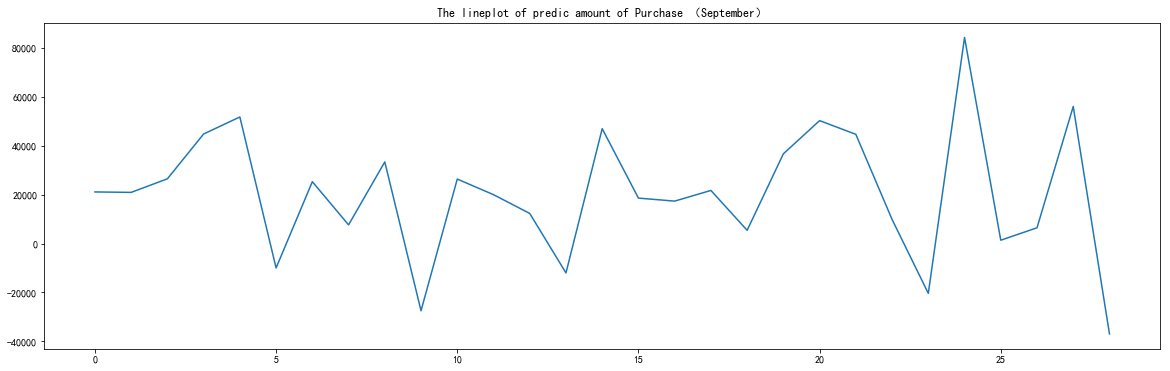

In [5]:
fig = plt.figure(figsize=(20,6))
plt.title("The lineplot of predic amount of Purchase （September）")
plt.plot(df_purchase,label='purchase')
plt.show()

根据LSTM计算后的预测结果绘制赎回的预测图

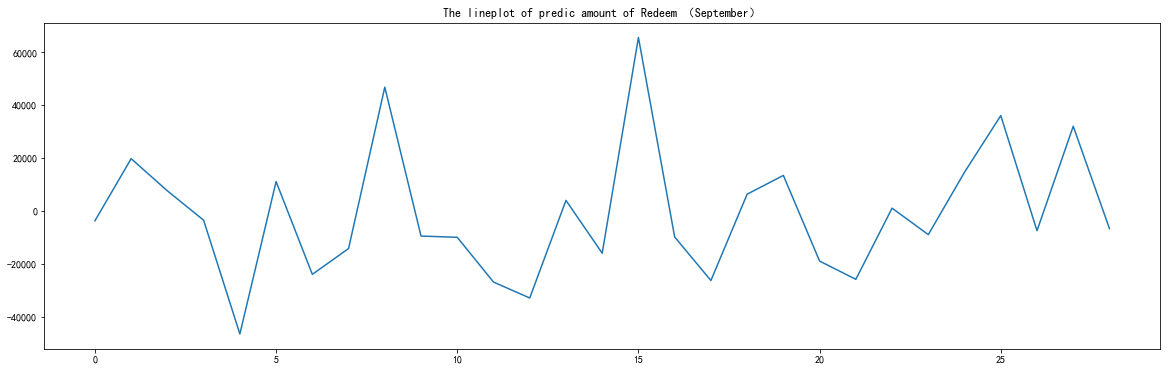

In [7]:
fig = plt.figure(figsize=(20,6))
plt.title("The lineplot of predic amount of Redeem （September）")
plt.plot(df_redeem,label='redeem')
plt.show()